Task 1

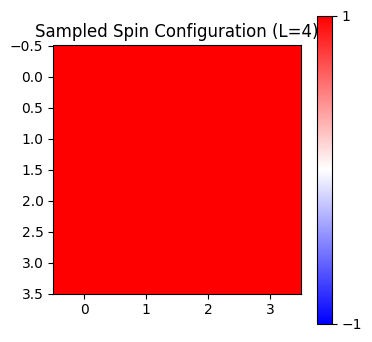

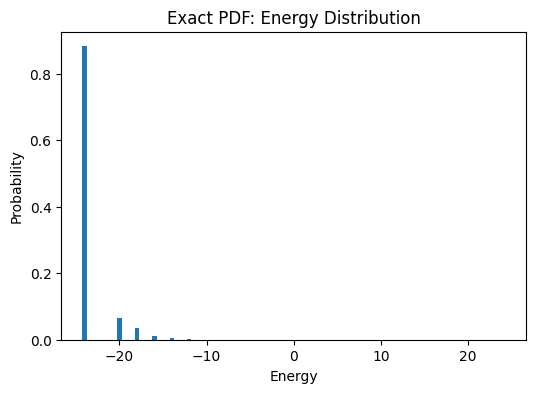

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 4
N_config = 2**(L*L)
configs = []
energies = np.empty(N_config)

for i in range(N_config):
    bits = np.array(list(np.binary_repr(i, width=L*L)), dtype=int)
    spins = 2*bits - 1
    config = spins.reshape((L, L))
    H = 0
    for r in range(L):
        for c in range(L):
            if r < L - 1:
                H += config[r, c] * config[r + 1, c]
            if c < L - 1:
                H += config[r, c] * config[r, c + 1]
    energies[i] = -H
    configs.append(config)

beta = 1.0
weights = np.exp(-beta * energies)
Z = np.sum(weights)
probs = weights / Z

sample_index = np.random.choice(N_config, p=probs)
sample_config = configs[sample_index]

plt.figure(figsize=(4,4))
plt.imshow(sample_config, cmap='bwr', vmin=-1, vmax=1)
plt.title("Sampled Spin Configuration (L=4)")
plt.colorbar(ticks=[-1, 1])
plt.show()

unique_energies = np.unique(energies)
pdf_vals = np.array([np.sum(probs[energies == E]) for E in unique_energies])

plt.figure(figsize=(6,4))
plt.bar(unique_energies, pdf_vals, width=0.5, align='center')
plt.xlabel("Energy")
plt.ylabel("Probability")
plt.title("Exact PDF: Energy Distribution")
plt.show()


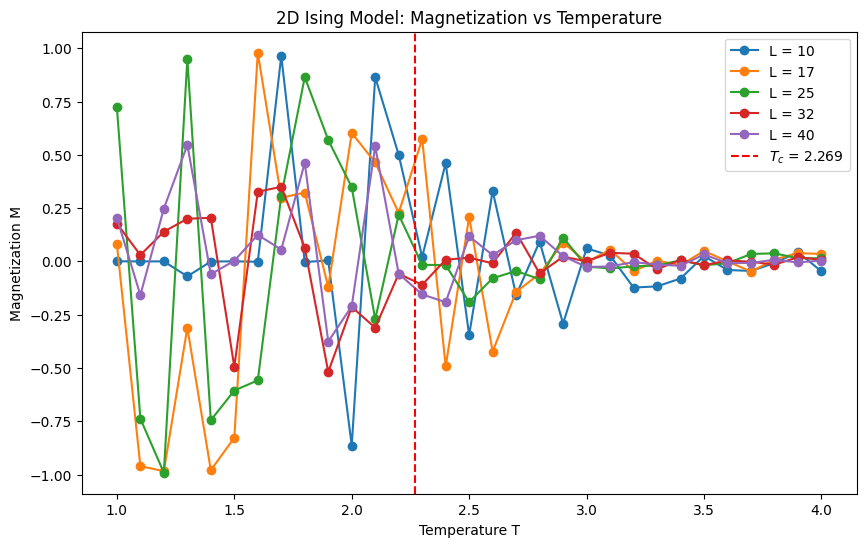

In [ ]:
def vectorized_gibbs_update(lattice, beta):
    neighbor_sum = np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) + \
                   np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)
    prob = 1.0 / (1.0 + np.exp(-2 * beta * neighbor_sum))
    lattice = np.where(np.random.rand(*lattice.shape) < prob, 1, -1)
    return lattice

def simulate_ising(L, T, equil_sweeps, meas_sweeps):
    beta = 1.0 / T
    lattice = np.random.choice([-1, 1], size=(L, L))
    for _ in range(equil_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
    mags = []
    for _ in range(meas_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
        mags.append(np.mean(lattice))
    return np.mean(mags)

T_vals = np.linspace(1.0, 4.0, 31)
L_vals = [10, 17, 25, 32, 40]
results = {}
equil_sweeps = 100
meas_sweeps = 100

for L in L_vals:
    m_vals = []
    for T in T_vals:
        m_vals.append(simulate_ising(L, T, equil_sweeps, meas_sweeps))
    results[L] = m_vals

Tc = 2.0 / np.log(1 + np.sqrt(2))
plt.figure(figsize=(10, 6))
for L in L_vals:
    plt.plot(T_vals, results[L], marker='o', label=f"L = {L}")
plt.axvline(Tc, color='red', linestyle='--', label=f"$T_c$ = {Tc:.3f}")
plt.xlabel("Temperature T")
plt.ylabel("Magnetization M")
plt.title("2D Ising Model: Magnetization vs Temperature")
plt.legend()
plt.show()


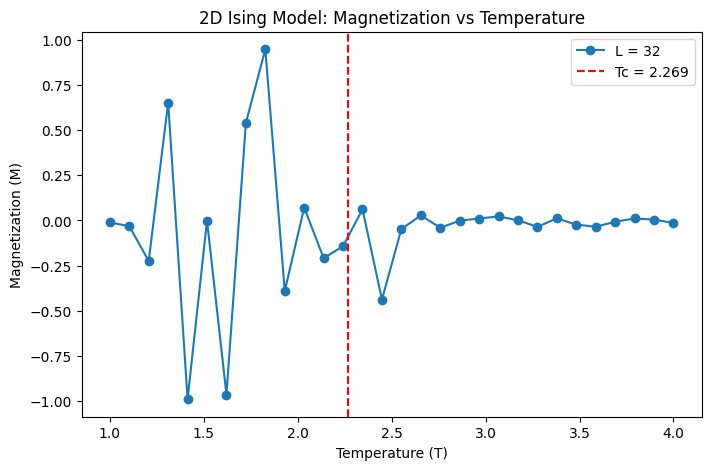

In [ ]:
def vectorized_gibbs_update(lattice, beta):
    # Periodic boundary conditions via np.roll
    neighbor_sum = (
        np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
        np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)
    )
    prob = 1.0 / (1.0 + np.exp(-2 * beta * neighbor_sum))
    lattice = np.where(np.random.rand(*lattice.shape) < prob, 1, -1)
    return lattice

def simulate_ising(L, T, equil_sweeps, meas_sweeps):
    beta = 1.0 / T
    lattice = np.random.choice([-1, 1], size=(L, L))
    for _ in range(equil_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
    mags = []
    for _ in range(meas_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
        mags.append(np.mean(lattice))
    return np.mean(mags)

L = 32
T_vals = np.linspace(1.0, 4.0, 30)  # Temperature range
equil_sweeps = 200
meas_sweeps = 200

m_vals = []
for T in T_vals:
    m_vals.append(simulate_ising(L, T, equil_sweeps, meas_sweeps))

Tc_exact = 2.0 / np.log(1 + np.sqrt(2))

plt.figure(figsize=(8,5))
plt.plot(T_vals, m_vals, marker='o', label=f"L = {L}")
plt.axvline(Tc_exact, color='red', linestyle='--', label=f"Tc = {Tc_exact:.3f}")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization (M)")
plt.title("2D Ising Model: Magnetization vs Temperature")
plt.legend()
plt.show()


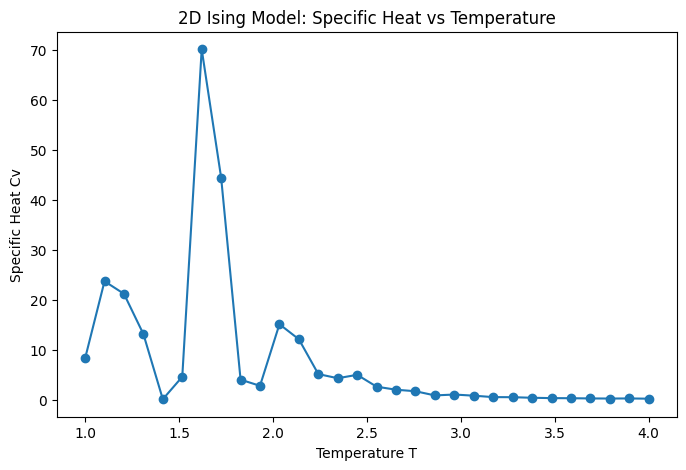

In [ ]:
def vectorized_gibbs_update(lattice, beta):
    neighbor_sum = (np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
                    np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1))
    prob = 1.0 / (1.0 + np.exp(-2 * beta * neighbor_sum))
    return np.where(np.random.rand(*lattice.shape) < prob, 1, -1)

def compute_energy(lattice, J=1):
    E = -J * (np.sum(lattice * np.roll(lattice, 1, axis=0)) + 
              np.sum(lattice * np.roll(lattice, 1, axis=1)))
    return E

def simulate_ising_energy(L, T, equil_sweeps, meas_sweeps, J=1):
    beta = 1.0 / T
    lattice = np.random.choice([-1, 1], size=(L, L))
    for _ in range(equil_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
    energies = []
    for _ in range(meas_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
        energies.append(compute_energy(lattice, J))
    energies = np.array(energies)
    N = L * L
    Cv = (beta**2 / N) * (np.mean(energies**2) - np.mean(energies)**2)
    return Cv

L = 32
T_vals = np.linspace(1.0, 4.0, 30)
equil_sweeps = 200
meas_sweeps = 200

Cv_vals = [simulate_ising_energy(L, T, equil_sweeps, meas_sweeps) for T in T_vals]

plt.figure(figsize=(8,5))
plt.plot(T_vals, Cv_vals, marker='o')
plt.xlabel("Temperature T")
plt.ylabel("Specific Heat Cv")
plt.title("2D Ising Model: Specific Heat vs Temperature")
plt.show()


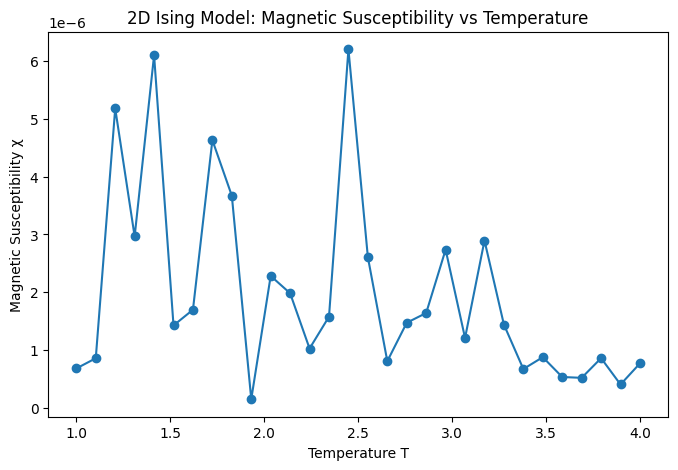

In [ ]:
def vectorized_gibbs_update(lattice, beta):
    neighbor_sum = (np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
                    np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1))
    prob = 1.0 / (1.0 + np.exp(-2 * beta * neighbor_sum))
    return np.where(np.random.rand(*lattice.shape) < prob, 1, -1)

def simulate_ising_magnetization(L, T, equil_sweeps, meas_sweeps):
    beta = 1.0 / T
    lattice = np.random.choice([-1, 1], size=(L, L))
    for _ in range(equil_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
    mags = []
    for _ in range(meas_sweeps):
        lattice = vectorized_gibbs_update(lattice, beta)
        mags.append(np.mean(lattice))
    return np.array(mags)

L = 32
T_vals = np.linspace(1.0, 4.0, 30)
equil_sweeps = 200
meas_sweeps = 200
N = L * L

susceptibilities = []
for T in T_vals:
    beta = 1.0 / T
    mags = simulate_ising_magnetization(L, T, equil_sweeps, meas_sweeps)
    M_mean = np.mean(mags)
    M2_mean = np.mean(mags**2)
    chi = beta / N * (M2_mean - M_mean**2)
    susceptibilities.append(chi)

plt.figure(figsize=(8,5))
plt.plot(T_vals, susceptibilities, marker='o')
plt.xlabel("Temperature T")
plt.ylabel("Magnetic Susceptibility χ")
plt.title("2D Ising Model: Magnetic Susceptibility vs Temperature")
plt.show()
